KNN - K nearest neighbour 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
Data=pd.read_csv("Zoo.csv")
Data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [2]:
Data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
Data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
# there are no null values found

In [6]:
Data.describe().round(4)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.0000,101.0000,101.0000,101.0000,101.0000,101.0000,101.0000,101.0000,101.0000,101.0000,101.0000,101.0000,101.0000,101.0000,101.0000,101.0000,101.0000
mean,0.4257,0.1980,0.5842,0.4059,0.2376,0.3564,0.5545,0.6040,0.8218,0.7921,0.0792,0.1683,2.8416,0.7426,0.1287,0.4356,2.8317
std,0.4969,0.4005,0.4953,0.4935,0.4278,0.4813,0.4995,0.4915,0.3846,0.4078,0.2714,0.3760,2.0334,0.4394,0.3366,0.4983,2.1027
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,1.0000
50%,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,4.0000,1.0000,0.0000,0.0000,2.0000
75%,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,4.0000,1.0000,0.0000,1.0000,4.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,8.0000,1.0000,1.0000,1.0000,7.0000


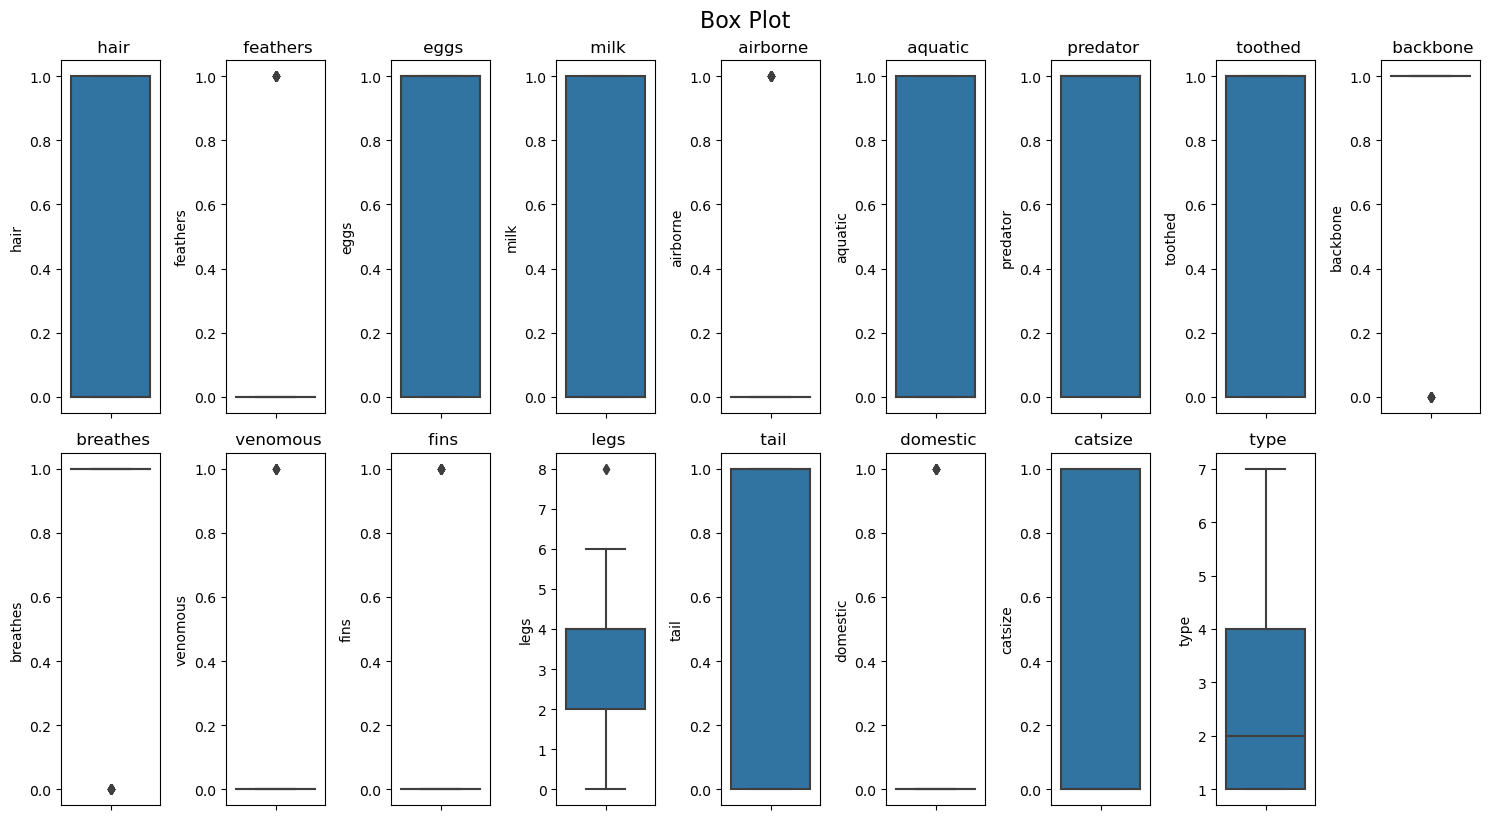

In [7]:
features = Data.drop('animal name', axis=1)
plt.figure(figsize=(15, 8))
for i, column in enumerate(features.columns, 1):
    plt.subplot(2, int((len(features.columns) + 1) / 2), i)
    sns.boxplot(y=features[column])
    plt.title(f' {column}')
    plt.tight_layout()
plt.suptitle('Box Plot', fontsize=16, y=1.02)
plt.show()

In [8]:
# here there are no outliers cause of binary digits and also each animal has its own features so treating the outliers would invalid

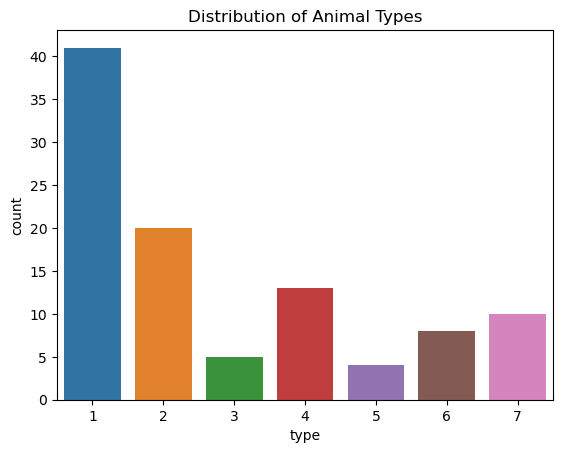

In [9]:
sns.countplot(x='type', data=Data)
plt.title('Distribution of Animal Types')
plt.show()

In [10]:
print(Data['type'].unique())
print(Data['type'].value_counts())

[1 4 2 7 6 5 3]
type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split
Data_X = Data.drop(columns=['animal name', 'type']) 
Data_y = Data['type'] 
X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_y, test_size=0.2, random_state=42, stratify=Data_y)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
k = 5  
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.82      0.86      0.84        21
weighted avg       0.92      0.95      0.93        21



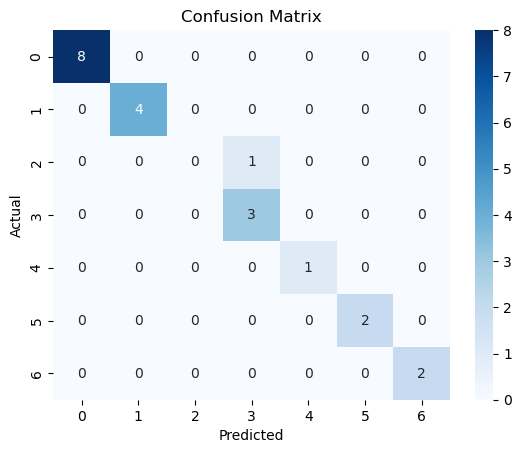

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = knn.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Accuracy - 95% , F1 score - 84%, Type 3, 4 - are slightly misclassifficated. from the heatmap we can see that 
# type 3 was predicted as type 4 leading to 0 recall.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
param_grid = {
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]
}
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
grid.fit(X_train, y_train)
print("Best k:", grid.best_params_['knn__n_neighbors'])
print("Best F1-macro score:", grid.best_score_)


Best k: 1
Best F1-macro score: 0.8095238095238095


In [20]:
## Finding the best k value using F1 macro score for tuning 
## as k = 5 shows some slight misclassiffication so i have used pipeline method to scale data, 

In [18]:
# tuning K value to 1 as it is the best match with the f1 score
from sklearn.neighbors import KNeighborsClassifier
k = 1  
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train, y_train)
#Euclidean is to measure the straight line distance between two points. Knn uses this to find the nearest point.

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



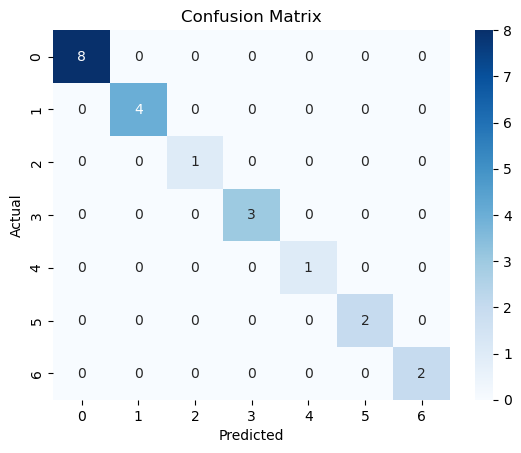

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = knn.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# now the accuracy is very good with no misclassiffications found.

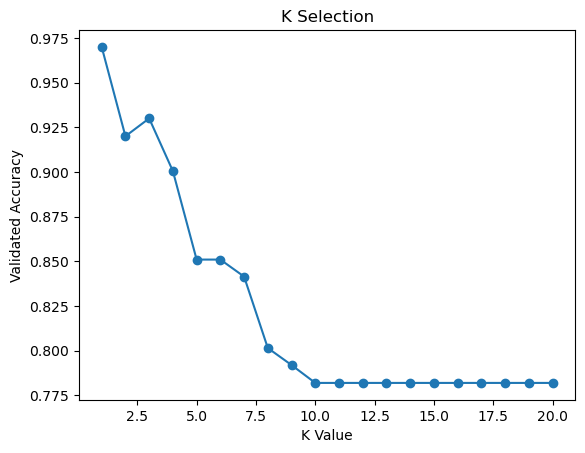

In [25]:
# prediction using accuracy - where accuracy = no. of correct preditions / total no. of prections
from sklearn.model_selection import cross_val_score
scores = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn,Data_X, Data_y, cv=5, scoring='accuracy').mean()
    scores.append(score)
plt.plot(k_range, scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Validated Accuracy')
plt.title('K Selection')
plt.show()


In [26]:
# Plot has highest accuracy at k=1 as mentionaed earlier.
# Accuracy decreases as k increases

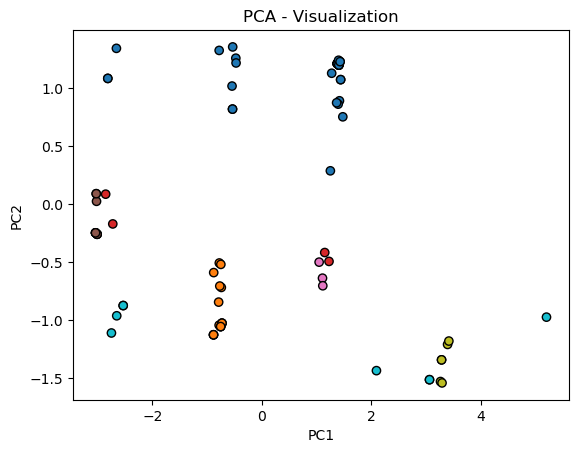

In [30]:
from sklearn.decomposition import PCA

X_2D = PCA(n_components=2).fit_transform(X_train)
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y_train, cmap='tab10', edgecolor='k')
plt.title("PCA - Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [33]:
# here colour represent each types, orange and blue clusters are grouped properly, few scattered or overlapping points is there, 

key parameters are n neighbour, weight, metric, algorithm, p where n neighbour is the nearest neighbour for prediction.
Weight 'uniform' — all neighbors have equal weight. 'distance' — closer neighbors have more influence.
Metric - The distance metric used to compute distance between points

Distances used in metrics is Euclidean, MAnhattan - Distance measured along axes at right angles, Hamming- Used for categorical or binary variables; counts how many positions differ., Minkowski- Generalization of Euclidean and Manhattan distances.